## Projet proba Pierre et Elliot 

On réutilise l'intégralité du code du projet de l'an dernier :

In [2]:
#Chargement de dépendances
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import special
import math
#Discrétisation
A=0
B=500
N=101
#Nombre de points de discrétisation
Delta=(B-A)/(N-1)
discretization_indexes=np.arange(N)
discretization=discretization_indexes*Delta
#Paramètres du modèle
mu=-5
a=50
sigma2=12
#Données 
depth=np.array([0,-4,-12.8,-1,-6.5,0])
observation_indexes=[0,20,40,60,80,100]

#Indices des composantes correspondant aux observations et aux componsantes non␣observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

In [3]:
#Fonction C
def Covexp(dist,rangeval,sigmaval):
    return sigmaval*np.exp(-dist/rangeval)

In [4]:
distmat=abs(np.subtract.outer(discretization,discretization))

In [5]:
Sigma=Covexp(distmat,a,sigma2)

In [6]:
SigmaObs=Sigma[observation_indexes,:][:,observation_indexes]
SigmaObsUnknown=Sigma[observation_indexes,:][:,unknown_indexes]
SigmaUnknown=Sigma[unknown_indexes,:][:,unknown_indexes]

In [7]:
invSigma=np.linalg.inv(SigmaObs)
Ec=mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))

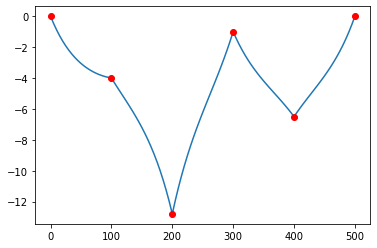

In [8]:
allval1=np.zeros(N)
allval1[unknown_indexes]=Ec
allval1[observation_indexes]=depth
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth,'ro')
plt.show()

In [9]:
SigmaCond=SigmaUnknown-np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),SigmaObsUnknown))

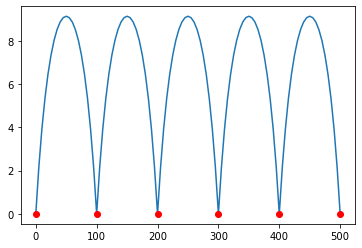

In [10]:
allval2=np.zeros(N)
allval2[unknown_indexes]=np.diag(SigmaCond)
plt.plot(discretization,allval2)
plt.plot(discretization[observation_indexes], np.zeros(np.shape(observation_indexes)[0]),'ro')
plt.show()

In [11]:
Cholesky=np.linalg.cholesky(SigmaCond)
x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu=Ec+np.matmul(Cholesky,x)

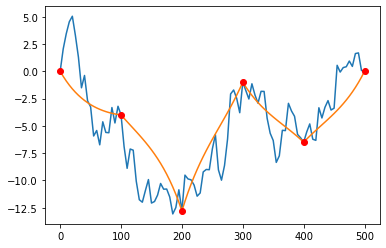

In [12]:
allval3=np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth,'ro')
plt.show()

In [13]:
def length(z,delta):
    return sum(np.sqrt(Delta**2+(z[1:N]-z[0:-1])**2))

In [14]:
K=10000
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)

In [15]:
sum(result)/K

522.3559610823607

In [16]:
length(allval1,Delta)

501.6468416918411

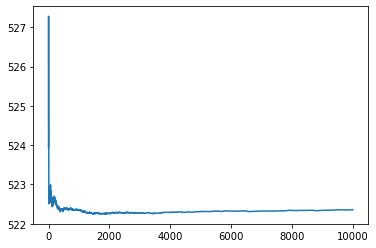

In [17]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.show()

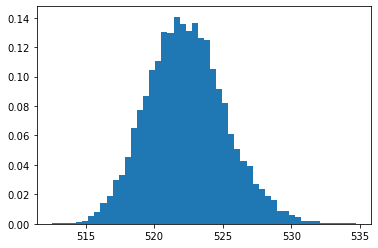

In [18]:
plt.hist(result,50,density=True)
plt.show()

In [19]:
np.quantile(result,[0.025,0.975])

array([517.05430067, 528.41157418])

In [20]:
np.mean(result>525)

0.1735

# Projet 2021 (Partie 2) :

## Valeurs positives

#### Question 1 : 
A la question 7 de la partie 1, on peut s'apercevoir que certains profils de profondeur présentent des valeurs positives, ce qui n'a pas de sens si on considère qu'il n'y a pas de partie émergée entre les deux côtes. Proposer et implémenter un algorithme de type rejet qui ne génèrera que des valeurs négatives. Représenter un profil de profondeur généré.

On se propose alors d'implémenter une méthode de rejet sur les profondeurs simulées: Si une des profondeurs simulées est positive, on la simule à nouveau jusqu'à ce qu'elle soit négative :

In [21]:
Cholesky=np.linalg.cholesky(SigmaCond)
x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu_r=Ec+np.matmul(Cholesky,x)
i= 0
while True in (simu_r > 0) :
    i+=1
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu_r=Ec+np.matmul(Cholesky,x)

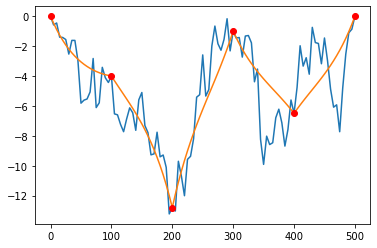

In [22]:
allval3_r=np.zeros(N)
allval3_r[unknown_indexes]=simu_r
allval3_r[observation_indexes]=depth
plt.plot(discretization,allval3_r)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth,'ro')
plt.show()

#### Question 2 

L'emploi de cet algorithme a-t-il un impact sur la valeur moyenne de la longueur de câble ? Sur l'histogramme des longueurs de câble ? Sur l'intervalle de confiance obtenu par la méthode des quantiles ? Sur la probabilité de dépassement du seuil de 525 m? Donner une estimation du taux de rejet de l'algorithme. Considérer 10000 simulations.

On veut estimer une moyenne du taux de rejet :

In [24]:
nombre_de_tests = 0
compteur = 1000
for indice in range(compteur):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu_r=Ec+np.matmul(Cholesky,x)
    while True in (simu_r > 0) :
        nombre_de_tests +=1
        x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu_r=Ec+np.matmul(Cholesky,x)
print(f"Le taux de rejet est de {1- compteur/nombre_de_tests : .2f}")
    
    

Le taux de rejet est  0.96


Comparons les longueurs moyennes de câble nécessaire avec ou sans rejet :
    

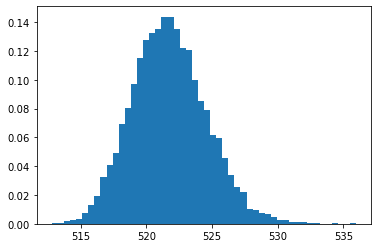

La nouvelle longueur moyenne de câble nécessaire est 521.74
Le nouvel intervalle de confiance est [516.60234261 527.52611011]
La nouvelle probabilité de dépasser une longueur moyenne de 525m est 0.13


In [32]:
#Avec rejet
K=10000
result_r = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu_r=Ec + np.matmul(Cholesky,x)
    while True in (simu_r > 0) :
        x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu_r=Ec+np.matmul(Cholesky,x)
    allval3_r[unknown_indexes]=simu_r
    result_r[i]=length(allval3_r,Delta)

plt.hist(result_r,50,density=True)
plt.show()
print(f"La nouvelle longueur moyenne de câble nécessaire est {sum(result_r)/K:.2f}")
print(f"Le nouvel intervalle de confiance est {np.quantile(result_r,[0.025,0.975])}")
print(f"La nouvelle probabilité de dépasser une longueur moyenne de 525m est {np.mean(result_r>525):.2}")

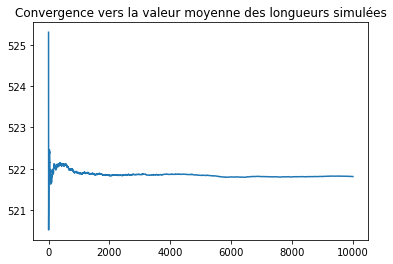

In [28]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result_r)/indice_simu)
plt.title("Convergence vers la valeur moyenne des longueurs simulées")
plt.show()

Alors que l'ancienne longueur moyenne était 522.44
et l'ancien intervalle de confiance était [517.15861822 528.42078135]
et la proba de dépassement : 0.18449


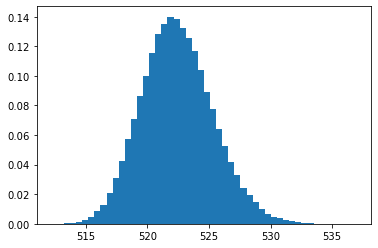

In [30]:
#Sans rejet
K=100000
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)
print(f"Alors que l'ancienne longueur moyenne était {sum(result)/K:.2f}")
print(f"et l'ancien intervalle de confiance était {np.quantile(result,[0.025,0.975])}")
print(f"et la proba de dépassement : {np.mean(result>525)}")

plt.hist(result,50,density=True)
plt.show()


On constate que la longueur moyenne de câble utilisée a diminué. C'est tout à fait cohérent, car la méthode de rejet a permis d'éliminer des points absurdes situés au dessus de la surface. Ce qui allongeait de fait la longueur moyenne de câble à utiliser.
La probabilité de dépasser les 525m de câble est donc moindre.
Toutefois, l'intervalle de confiance n'est pas restreint, il est simplement centré sur la nouvelle valeur moyenne, ce qui s'observe bien sur les historigrammes.



#### Question 3:

$f_{µ|Z_{obs}=z}(x) = \frac{f_{Z_{obs}|µ = x}(z) . f_µ(x)}{f_{Z_{obs}}(z)}$ donc 
$$
f_{µ|Z_{obs}=z}(x) \propto f_{Z_{obs}|µ = x}(z) . f_µ(x)
$$
à $z$ fixé. Comme cette fonction est d'intégrale 1 par rapport à $x$, il suffit de trouver une fonction qui soit proportionnelle à la même quantité à $z$ fixé et qui soit d'intégrale 1 pour en déduire l'égalité entre cette fonction et $f$.  
Evaluons pour celà 
$$
-2ln(f_{Z_{obs}|µ = x}(z) . f_µ(x))
$$
sachant qu'on pourra donc ne pas tenir compte des termes additifs ne dépendants que de $z$.  
On rappelle que
$$
f_{Z_{obs}|µ = x}(z) = \frac{1}{(2\pi)^{n/2}\sqrt{det(C_{obs})}}exp(-\frac{1}{2}(z-x)^tC_{obs}^{-1}(z-x))
$$
et que 
$$
f_µ(x)=\frac{1}{\sigma \sqrt{2\pi}}exp(-\frac{(x+5)^2}{8})
$$
Ainsi, on a 
$$
-2ln(f_{Z_{obs}|µ = x}(z) . f_µ(x)) = (z-x)^tC_{obs}^{-1}(z-x) +\frac{(x+5)^2}{4}
$$
En mettant cette expression sous forme canonique, puis en ne considérant plus le terme constant, on reconnait la densité d'un vecteur aléatoire gaussien. Le coefficient devant $x^2$ est alors identifiable à $\frac{1}{\hat \sigma^2}$ et le coefficient en $x$ est identifiable à $\frac{-2\hat µ}{\hat \sigma^2}$.  
Ici, il convient de rectifier l'abus de notation précédent: le vecteur qu'on a noté $x$ est en fait $1x$ où 1 est un vecteur et x est le scalaire. 
On obtient donc bien sans problème que 
$$
\hat \sigma^2  = (1^tC_{obs}^{-1}1+\frac{1}{4})^{-1}
$$
et en remarquant que $C_{obs}$ est symétrique et inversible puisqu'il s'agit d'une matrice de covariance et qu'il n'existe pas de relation linéaire presque sûre entre les mesures, $C_{obs}^{-1}$ est également symétrique et on peut regrouper $z^tC_{obs}^{-1}1$ et $1^t C_{obs}^{-1}z$, ce qui nous donne bien:
$$
\hat µ = \hat \sigma ^2 (1^tC_{obs}^{-1}z_{obs}-\frac{5}{4})
$$
La densité de probabilité correspondant à la loi normale de paramètre ($\hat µ$,$\hat \sigma ^2$) étant proportionnelle par construction à la fonction précédente, et étant d'intégrale 1, on peut bien conclure que 
$$
µ|Z_{obs}=z_{obs} \sim \mathcal{N}(\hat\mu,\,\hat\sigma^{2})
$$

#### Question 4
On sait qu'on peut considérer $f_{|Z=z}$ comme une densité de probabilité. Appelons la $\tilde{f}$. Les formules du cours s'appliquent à $\tilde{f}$. On obtient alors l'égalité désirée.

#### Question 5
Par application de la question précédente: on obtient:
$$
f_{Z_{UNK},µ|Z_{obs}=z_{obs}}(z_u,x) = f_{Z_{UNK}|µ=x,Z_{obs}=z_{obs}}(z_u).f_{µ|Z_{obs}=z_{obs}}(x)
$$
On rappelle que 
$$
f_{Z_{UNK}|µ=x,Z_{obs}=z_{obs}}(z_u) = \frac{1}{(2\pi)^{\frac{N+1-n}{2}}\sqrt{det(CS)}} exp(-\frac{1}{2}(z_{unk}-m_{Z_{UNK}|Z_{obs}=z_{obs},µ=x})^t(CS)^{-1}(z_{unk}-m_{Z_{UNK}|Z_{obs}=z_{obs},µ=x})
$$
où $CS = C_{obs}-C_{unk,obs}C_{obs}^{-1}C_{obs,unk}$ et $m_{Z_{UNK}|Z_{obs}=z_{obs},µ=x} = x.1 + C_{unk,obs}C_{obs}^{-1}(z_{obs}-x.1)$.

#### Question 6 : Calculer $\mu$ et $\sigma^2$

Pour ce faire, on applique directement les formules déterminées ci-dessus.

In [40]:
#La question 3 donne directement 

shape_Cobs = np.shape(SigmaObs) 
UN = np.ones(shape = (shape_Cobs[0],1))
sigma2_chap = (UN.T@np.linalg.inv(SigmaObs)@UN + 0.25)**-1
sigma2_chap = sigma2_chap[0][0]
f'La valeur de la variance de mu sachant les variables observées est donc {sigma2_chap:.3f}'

'La valeur de la variance de mu sachant les variables observées est donc 1.537'

In [41]:
mu_chap = sigma2_chap*(UN.T@np.linalg.inv(SigmaObs)@depth- 1.25)
mu_chap = mu_chap[0]
f"La valeur de l'espérance de mu sachant les variables observées est {mu_chap:.3f}"

"La valeur de l'espérance de mu sachant les variables observées est -4.291"

#### Question 7

On sait que $P(µ>0) = 1/2 - \frac{1}{2}erf(-\frac{\hat µ}{\hat \sigma \sqrt{2}})$. On code donc:

In [42]:
proba_mu_positif = 0.5 - 0.5*scipy.special.erf(-mu_chap/(sigma2_chap*math.sqrt(2)))
print(f" P(µ>0) = {proba_mu_positif:.3f}")

 P(µ>0) = 0.003


Il est en effet très peu probable que $µ$ soit positif.

In [47]:

#Pour simuler mu sachant Zobs, avec mu négatif on se propose une méthode du rejet :
mu_cond = np.random.normal(mu_chap, sigma2_chap)
while mu_cond > 0 :
    mu_cond = np.random.normal(mu_chap, sigma2_chap)

mu_cond

-2.811122575073543

#### Question 8 

In [53]:
#Soit mu = mu_cond :
mu = mu_cond
invSigma=np.linalg.inv(SigmaObs)
Ec=mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
Cholesky=np.linalg.cholesky(SigmaCond)
x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu_mu=Ec+np.matmul(Cholesky,x)
i= 0
while True in (simu_mu > 0) :
    i+=1
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu_mu=Ec+np.matmul(Cholesky,x)

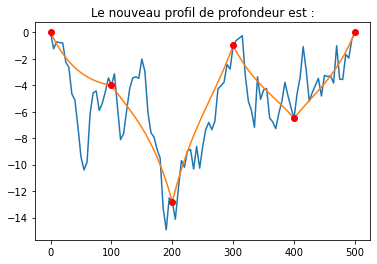

In [54]:
allval3_mu=np.zeros(N)
allval3_mu[unknown_indexes]=simu_mu
allval3_mu[observation_indexes]=depth
plt.plot(discretization,allval3_mu)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth,'ro')
plt.title("Le nouveau profil de profondeur est :")
plt.show()

#### Question 9 :

Et on en déduit la nouvelle valeur moyenne de câble 521.7215459988923 qui converge comme suit :


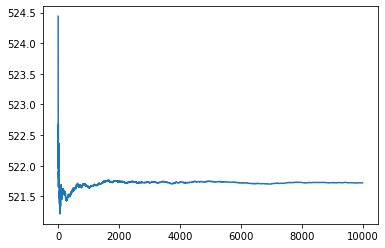

In [59]:
K=10000
result_mu = np.zeros(K)

for i in range(K):
    mu_cond = np.random.normal(mu_chap, sigma2_chap,)
    while mu_cond > 0 :
        mu_cond = np.random.normal(mu_chap, sigma2_chap)
    mu = mu_cond
    invSigma=np.linalg.inv(SigmaObs)
    Ec=mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu_mu=Ec + np.matmul(Cholesky,x)
    while True in (simu_mu > 0) :
        x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
        simu_mu=Ec+np.matmul(Cholesky,x)
    allval3_mu[unknown_indexes]=simu_mu
    result_mu[i]=length(allval3_mu,Delta)
    
print(f"Et on en déduit la nouvelle valeur moyenne de câble {sum(result_mu)/K :.3f} qui converge comme suit :")
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result_mu)/indice_simu)
plt.show()

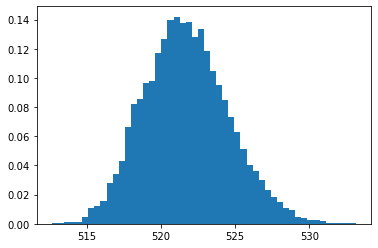

In [56]:
plt.hist(result_mu,50,density=True)
plt.show()

In [57]:
print(f"Le nouvel intervalle de confiance est {np.quantile(result_mu,[0.025,0.975])}")

Le nouvel intervalle de confiance est [516.50703367 527.66144373]


In [62]:
print(f"Et donc la probabilité de dépassement est {np.mean(result_mu > 525)}")

Et donc la probabilité de dépassement est 0.1253


Ainsi la longueur moyenne de câble a encore diminué et l'intervalle de confiance s'est recentré autour de la nouvelle valeur moyenne.

#### Question 10 